                                                                                                 Jalajashree Gollapalli
                                                                                                  16 September 2020

# Task3: Unsupervised Learning - K-Means Clustering
In this task we predict the optimum number of clusters from the Iris dataset and represent it visually.

### What is K-Means Clustering? 
K-Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity.Unsupervised learning means that there is no outcome to be predicted and the algorithm just tries to find patterns in the data. In K-Means clustering, we have to specify the number of clusters we want the data to be grouped into. Thealgorithm randomle assigns each observation to a cluster and finds the centroid of each cluster. Then the algorithm iterates through two steps: 

* Reassign data points to the cluster whose centroid is closest.
* Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the Euclidean distance between the data points and their respective cluster centroids.

### Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets

### Load Iris Dataset 

In [2]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Explore the data 

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [7]:
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

### Data Visualization 

<Figure size 1440x1440 with 0 Axes>

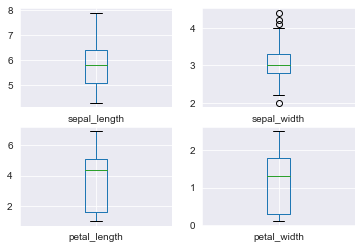

In [8]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
iris_df.plot(kind='box',layout=(2,2),sharex=False,sharey=False,subplots=True)
plt.show()

### Pair Plot 

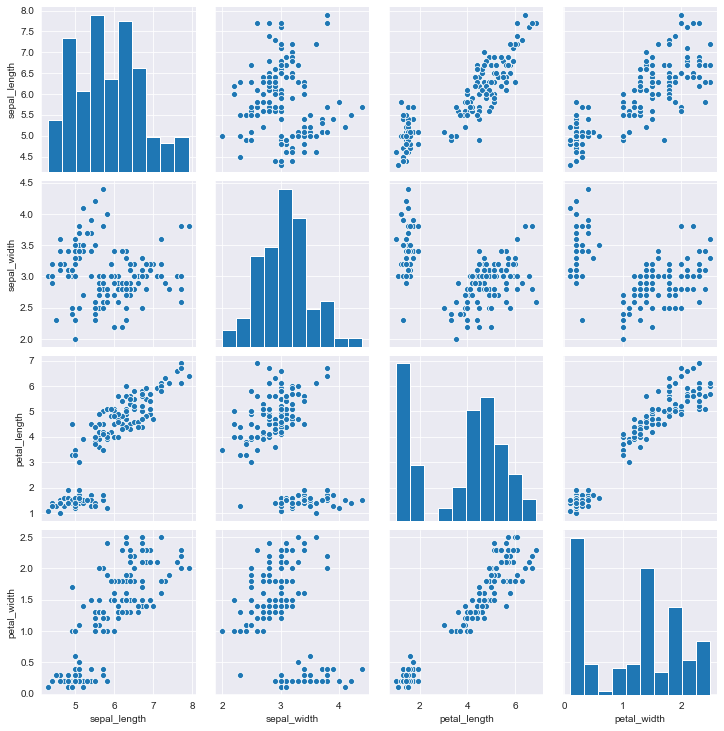

In [9]:
sns.pairplot(iris_df,palette='viridis')

* Optimum number of clusters for K-Means is determined by using Inertia.    The K-Means algorithm aims to choose centroids that minimizes the inertia. Inertia can be recognized as a measure of hoow internally coherent clusters are.

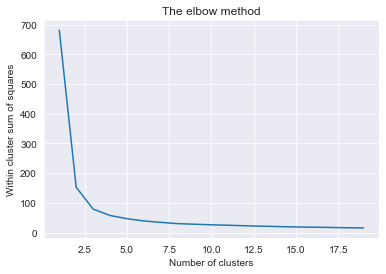

In [10]:
# Finding the optimum number of clusters for k-means classification

x=iris_df.iloc[:,[0,1,2,3]].values

clusters=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    clusters.append(kmeans.inertia_)
    
# Plotting the results onto a line graph,
# allowing us to observe 'The elbow'
plt.plot(range(1,20),clusters)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

This is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.

From this graph we choose the number of clusters as 3.

### K Means Cluster Creation
Applying kmeans to the dataset/Creating the kmeans classifier

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

### Fit the model to all the data except for the species label. 

In [12]:
kmeans.fit(iris_df.drop('species',axis=1))

KMeans(n_clusters=3, random_state=0)

### Cluster center vectors 

In [13]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [15]:
y_kmeans=kmeans.fit_predict(x)

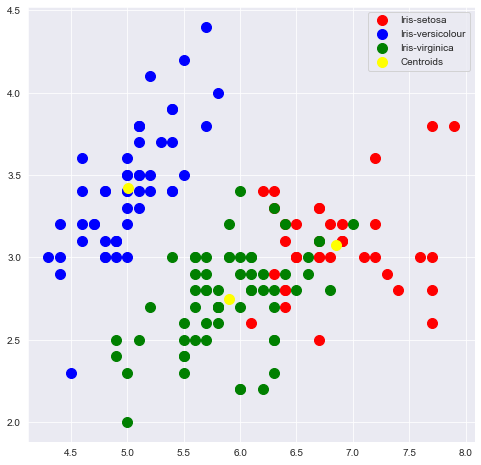

In [16]:
#Visualizing the clusters - On the first two columns

plt.figure(figsize=(8,8))
sns.set_style('darkgrid')

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green',label='Iris-virginica')

#Plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')

plt.legend()

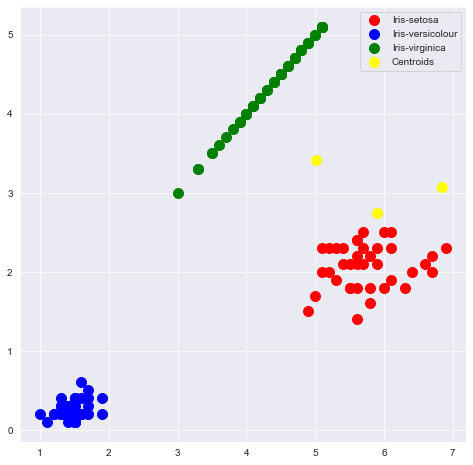

In [17]:
#Visualizing the clusters - On the last two columns

plt.figure(figsize=(8,8))
sns.set_style('darkgrid')

plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,2],
           s=100,c='green',label='Iris-virginica')

#Plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')

plt.legend()

# So the optimal number of clusters are 3.